In [264]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def jitter(k=1):
    return np.random.uniform(-0.005, 0.005, size=k)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

df = pd.read_csv('0524_exp_results.txt', delimiter='\t')
df.head()

,macro,micro,split,pos,mode,obj,window,k,reduce,supervised
0,0.05,0.08,train,NOUN,random,False,1,2,None,False
1,0.15,0.09,dev,NOUN,random,False,1,2,None,False
2,0.07,0.16,train,VERB,random,False,1,2,None,False
3,0.10,0.08,dev,VERB,random,False,1,2,None,False
4,0.95,1.00,train,NOUN,oracle,False,1,2,None,False


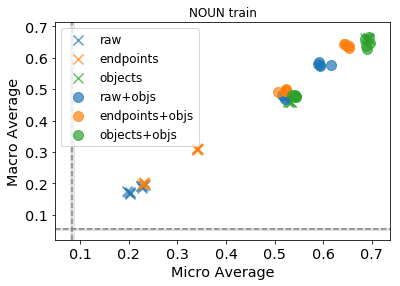

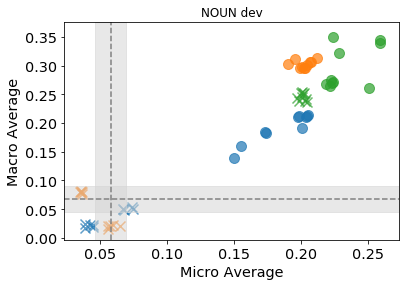

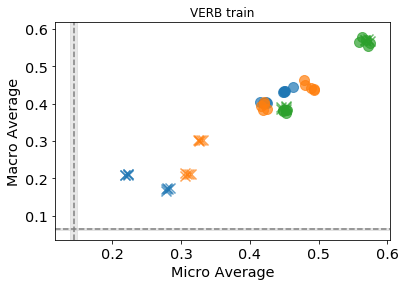

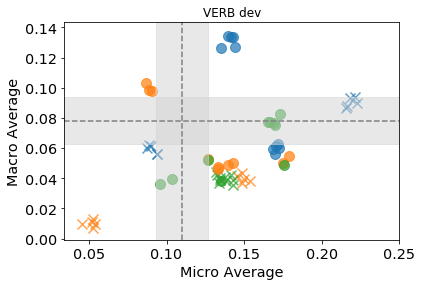

In [265]:
DR = "None"
for pos in ["NOUN", "VERB"]:
    for split in ["train", "dev"]:
        M = df.loc[(df['pos'] == pos) & (df['split'] == split)]
        rand_macro = M[M["mode"] == "random"]["macro"]
        rand_micro = M[M["mode"] == "random"]["micro"]

        plt.axhline(rand_macro.mean(), color='gray', ls='--')
        plt.axhspan(rand_macro.mean()-rand_macro.sem(),
                    rand_macro.mean()+rand_macro.sem(), color='lightgray', alpha=0.5)

        plt.axvline(rand_micro.mean(), color='gray', ls='--')
        plt.axvspan(rand_micro.mean()-rand_micro.sem(),
                    rand_micro.mean()+rand_micro.sem(), color='lightgray', alpha=0.5)

        M = M[M["reduce"] == DR]

        for obj in [False, True]:
            for i, mode in enumerate(["raw", "endpoints", "objects"]):
                m = M.loc[(M['mode'] == mode) & (M['obj'] == obj)]
                mk = 'o' if obj else 'x'
                l = mode+"+objs" if obj else mode
                plt.scatter(m["micro"]+jitter(len(m["micro"])),
                            m["macro"]+jitter(len(m["macro"])),
                            label=l, marker=mk, color=colors[i], alpha=0.7, s=100)

        plt.xlabel("Micro Average", fontsize="x-large")
        plt.ylabel("Macro Average", fontsize="x-large")
        if pos == "VERB" and split == "dev":
            plt.xticks(np.arange(0.05, 0.3, 0.05), fontsize="x-large")
        else:  
            plt.xticks(fontsize="x-large")
        plt.yticks(fontsize="x-large")
        plt.title("%s %s"%(pos, split))
        if pos == "NOUN" and split == "train":
            plt.legend(ncol=1, loc="upper left", fontsize="large")
        plt.savefig("figures/macromicro_scatter_%s_%s_dr=%s.pdf"%(pos, split, DR), bbox_inches='tight')
        plt.show()

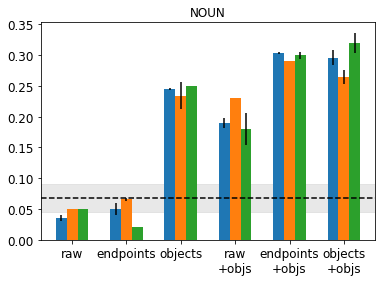

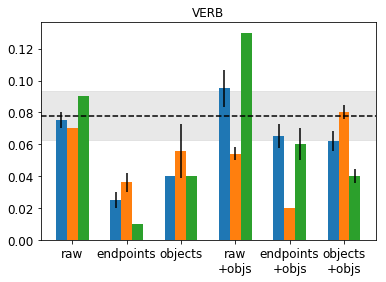

In [266]:
split = "dev"
W = 1
k = 2
idx = 1
for pos in ["NOUN", "VERB"]:

    M = df.loc[(df['pos'] == pos) & (df['split'] == split)]
        
    rand_macro = M[M["mode"] == "random"]["macro"]
        
    plt.axhline(rand_macro.mean(), color='k', ls='--')
    plt.axhspan(rand_macro.mean()-rand_macro.sem(),
                rand_macro.mean()+rand_macro.sem(), color='lightgray', alpha=0.5)

    M = M.loc[(M["k"] == k) & (M['window'] == W)]

    withouts = [[],[]]
    withs = [[],[]]
    sups50 = [[],[]]
    sups = [[],[]]
    lbls = []
    for obj in [False, True]:
        for i, mode in enumerate(["raw", "endpoints", "objects"]):
            m = M.loc[(M['mode'] == mode) & (M['obj'] == obj)]
            mk = 'o' if obj else 'x'
            lbls.append(mode+"\n+objs" if obj else mode)
            withouts[0].append(m[m["reduce"] == "None"]["macro"].mean())
            withouts[1].append(m[m["reduce"] == "None"]["macro"].sem())
            withs[0].append(m.loc[(m["reduce"] == "50") &
                               (m["supervised"] == False)]["macro"].mean())
            withs[1].append(m.loc[(m["reduce"] == "50") &
                               (m["supervised"] == False)]["macro"].sem())
            sups50[0].append(m.loc[(m["reduce"] == "50") &
                               (m["supervised"] == True)]["macro"].mean())
            sups50[1].append(m.loc[(m["reduce"] == "50") &
                               (m["supervised"] == True)]["macro"].sem())
            sups[0].append(m.loc[(m["reduce"] == "None") &
                               (m["supervised"] == True)]["macro"].mean())
            sups[1].append(m.loc[(m["reduce"] == "None") &
                               (m["supervised"] == True)]["macro"].sem())
            
    plt.bar(np.arange(len(withouts[0])), withouts[0],
            width=0.2, label="Default", yerr=withouts[1])
    plt.bar(np.arange(len(withouts[0]))+0.2, withs[0],
            width=0.2, label="+Dim. Red.", yerr=withs[1])
    plt.bar(np.arange(len(withouts[0]))+0.4, sups50[0],
            width=0.2, label="+Supervised", yerr=sups50[1])
    #plt.bar(np.arange(len(withouts[0]))+0.6, sups[0],
    #        width=0.2, label="+Supervised N-1", yerr=sups[1])
    plt.xticks(np.arange(len(lbls))+0.2, lbls, fontsize='large', ha="center")
    plt.yticks(fontsize='large')
    #plt.legend(loc="upper left", fontsize='large')
    plt.title(pos)
    plt.savefig("figures/dr_bars_%s_%s.pdf"%(pos, split), bbox_inches='tight')
    plt.show()

## Appendix

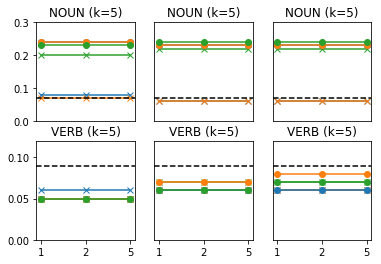

In [145]:
split = "dev"
DR = "None"
W = 1
idx = 1
for pos in ["NOUN", "VERB"]:
    #for W in [1, 2, 5]:
    for k in [2, 5, 10]:
        plt.subplot(2, 3, idx)
        M = df.loc[(df['pos'] == pos) & (df['split'] == split)]
        
        rand_macro = M[M["mode"] == "random"]["macro"].item()
        rand_micro = M[M["mode"] == "random"]["micro"].item()
        
        M = M.loc[(M["reduce"] == DR) & (M['window'] == W)]

        for obj in [False, True]:
            for i, mode in enumerate(["raw", "endpoints", "objects"]):
                m = M.loc[(M['mode'] == mode) & (M['obj'] == obj)]
                mk = 'o' if obj else 'x'
                l = mode+"+objs" if obj else mode
                lst = []
                #for k in [2, 5, 10]:
                for W in [1, 2, 5]:
                    try:
                        lst.append(m[m["k"] == k]["macro"].item())
                    except ValueError:
                        print(m[m["k"] == k])
                plt.plot(np.arange(3), lst, label=l, marker=mk, color=colors[i])
        plt.axhline(rand_macro, color='k', ls='--')
        #plt.title("%s (window=%s)"%(pos, W))
        plt.title("%s (k=%s)"%(pos, W))
        if idx <= 3:
            plt.xticks([])
        else:
            #plt.xticks([0, 1, 2], [2, 5, 10])
            plt.xticks([0, 1, 2], [1, 2, 5])
        if pos == 'NOUN':
            plt.ylim(0, 0.3)
        else:
            plt.ylim(0, 0.12)
        if idx not in [1,4]:
            plt.yticks([])
        idx += 1  
plt.savefig("figures/effect-of-window.pdf", bbox_inches='tight')
#plt.savefig("figures/effect-of-k.pdf", bbox_inches='tight')
plt.show()

In [242]:
import csv
from scipy.stats import describe

def sort_fn(lst):
    return len([e for e in lst if e>0])/len(lst)

tgts = []
for line in open('../nbc/target_words.txt').readlines():
    pos, w = line.strip().split('\t')
    if pos in ['NOUN', 'VERB']:
        tgts.append('%s_%s'%(w, pos))
tset = set(tgts)

by_part = {}
for row in csv.DictReader(open('aligned_data.tsv'), delimiter='\t'):
    p = row['participant']
    if p not in by_part:
        by_part[p] = [0 for _ in tgts]
    k = '%s_%s'%(row['lemma'], row['pos'])
    if k in tset:
        by_part[p][tgts.index(k)] += 1
    
for p, lst in sorted(by_part.items(), key=lambda e:sort_fn(e[1]), reverse=True):
    print("%s\t%.02f\t%s"%(p, sort_fn(lst), ' '.join(['%d'%e for e in lst])))

4_2b	0.69	4 0 1 0 4 7 4 8 0 4 1 1 3 22 0 0 1 8 0 13 1 20 0 2 0 2 8 0 0 1 23 0 4 6 6 1 1 0 3
1_1a	0.67	3 0 9 0 5 0 7 3 0 6 5 4 1 0 0 0 0 4 3 1 11 24 0 6 1 4 0 5 0 4 20 0 7 6 1 6 1 0 3
18_2c	0.64	3 0 1 3 6 1 2 5 0 7 0 1 4 3 3 0 1 3 0 2 2 9 0 1 2 0 2 0 0 0 16 0 13 10 4 2 0 0 0
6_2c	0.62	23 8 7 0 3 3 2 4 0 14 3 11 9 0 0 0 3 29 0 3 48 30 0 0 0 2 2 0 0 0 6 0 1 4 6 1 28 0 0
2_2a	0.59	3 0 7 0 2 1 2 6 0 13 3 7 1 4 0 0 0 2 0 1 4 0 0 8 2 1 0 0 0 0 22 0 1 2 4 4 0 0 3
17_1c	0.59	2 0 3 0 5 0 9 9 0 5 7 3 2 3 0 0 1 13 0 0 30 27 0 2 8 0 13 3 0 1 33 0 6 5 0 1 0 0 0
10_2b	0.56	3 0 8 0 1 1 5 2 0 8 4 4 0 9 0 1 0 4 0 0 11 20 0 3 1 0 0 0 0 0 26 0 15 3 1 2 0 0 2
11_1c	0.56	5 3 5 10 0 10 9 3 0 15 1 0 0 5 0 0 2 10 0 0 4 9 0 2 5 4 6 0 0 0 0 0 15 10 0 3 0 0 3
7_1a	0.54	5 2 5 3 2 5 9 17 0 0 0 2 0 0 1 0 0 9 0 0 4 22 0 0 3 1 1 0 0 0 18 0 4 3 10 3 0 0 0
12_2c	0.54	1 0 2 0 0 2 5 3 0 3 0 5 4 4 0 0 0 1 0 0 15 9 0 18 1 1 0 0 0 0 12 0 4 5 8 1 0 0 2
8_2a	0.51	2 0 9 0 0 0 2 7 0 6 7 0 13 3 0 0 1 0 0 0 38 33 0 0 1 5 1 0 0 4 2